In [1]:
!pip install kaggle
!python -m pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 136 kB 5.4 MB/s 


In [ ]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

In [3]:
# before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 32.9MB/s]


In [5]:
!ls


kaggle.json  mobile-price-classification.zip  sample_data


In [6]:
# Extract the data
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask
from dask.dataframe import DataFrame

In [14]:
# Import the relevant files
df = dask.dataframe.read_csv('/content/files/train.csv')

In [15]:
df.head()
df=df.compute()

1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


2

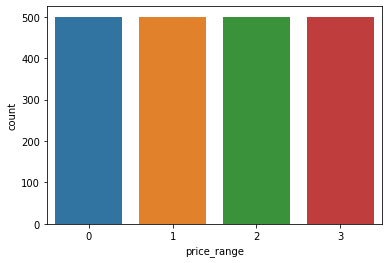

In [20]:
sns.countplot(x = "price_range", data = df)
plt.show()

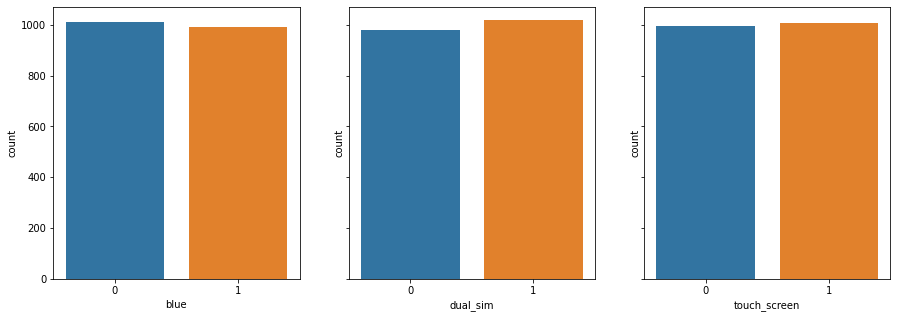

In [21]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
sns.countplot(ax=axes[0],x='blue', data=df);
sns.countplot(ax=axes[1],x='dual_sim', data=df);
sns.countplot(ax=axes[2],x='touch_screen', data=df);

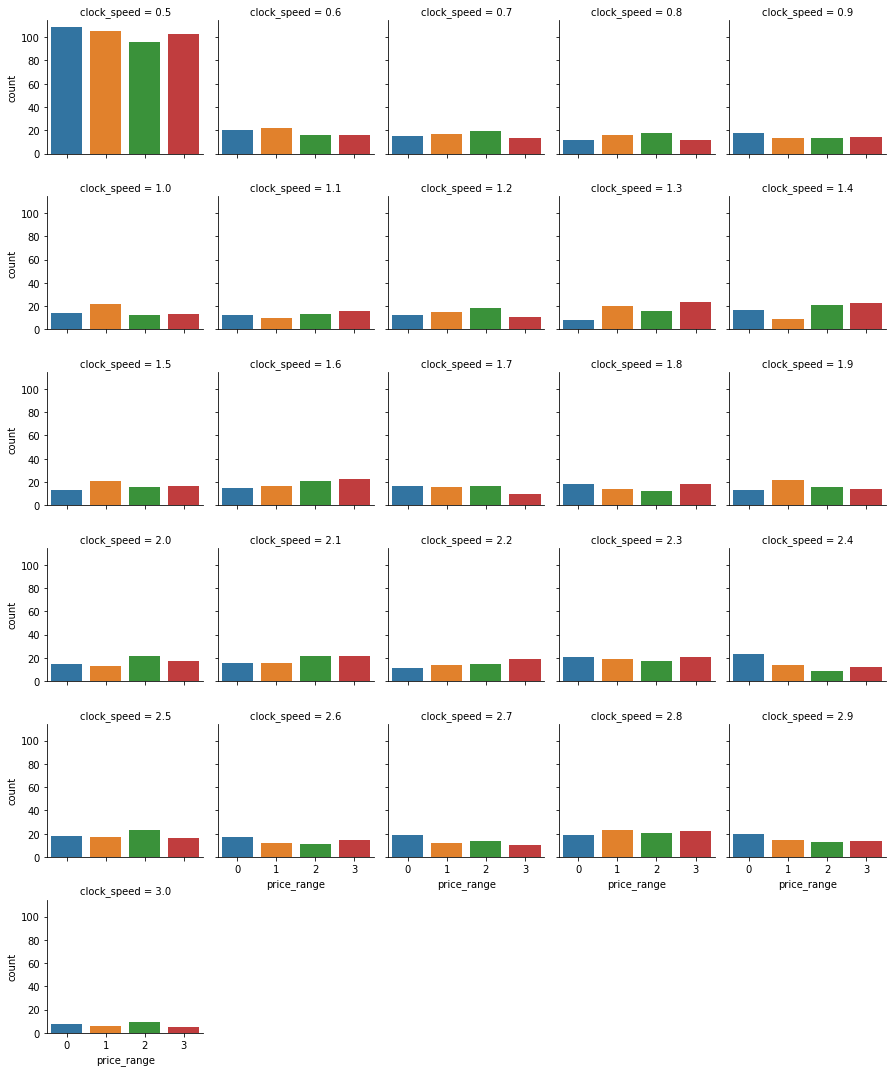

In [22]:
sns.catplot(x="price_range", col="clock_speed",  data=df, kind="count", height=2.5, col_wrap=5);


In [23]:
df2=df[['price_range','battery_power','clock_speed','int_memory','mobile_wt','touch_screen']]


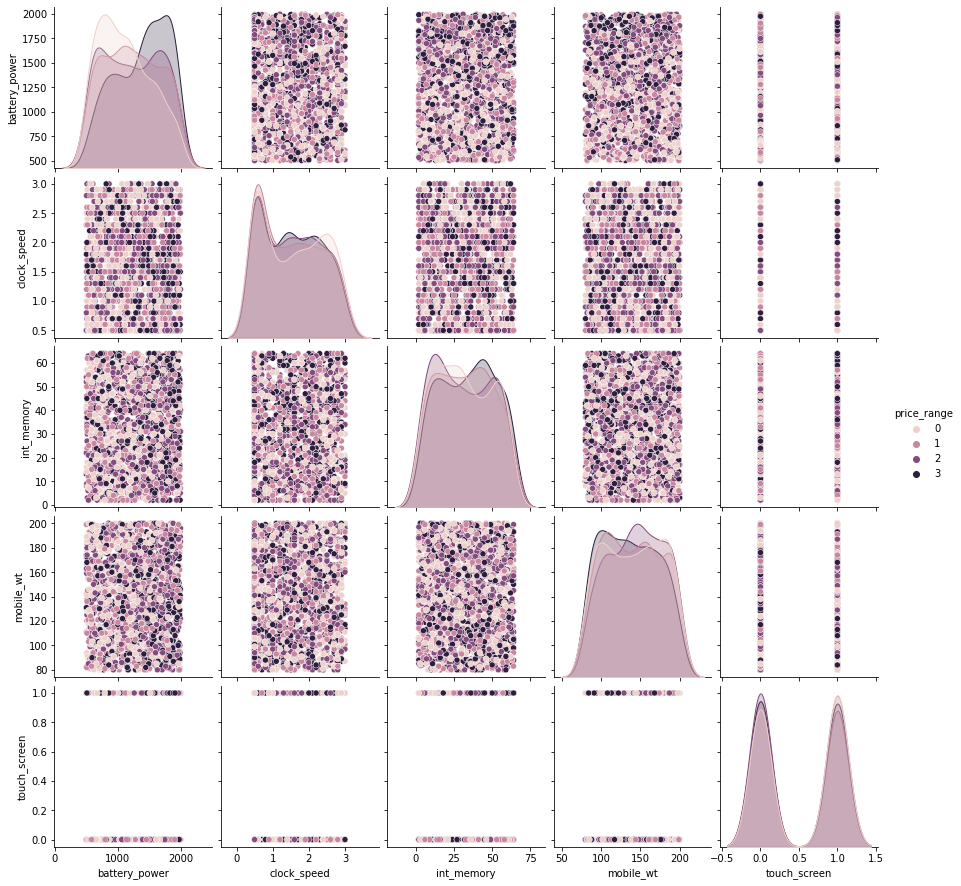

In [24]:
sns.pairplot(data=df2, hue='price_range');

Text(0, 0.5, 'int_memory(#)')

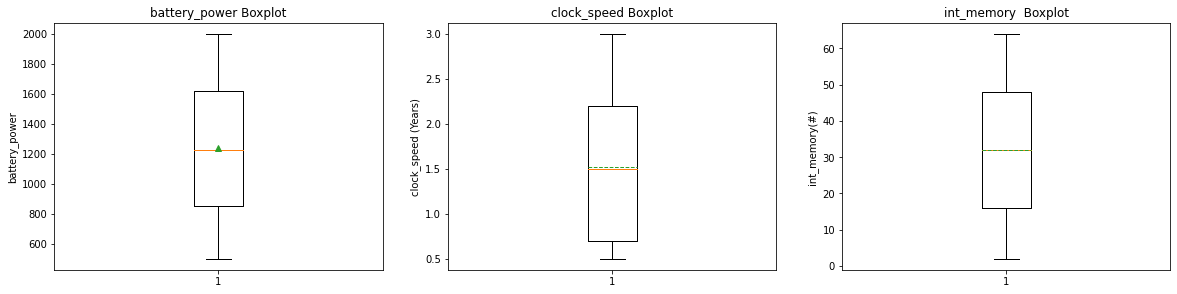

In [25]:
plt.subplots(1,3,figsize=(20,10),sharey=True)
plt.subplot(231)
plt.boxplot(x=df['battery_power'], showmeans = True)
plt.title('battery_power Boxplot')
plt.ylabel('battery_power')

plt.subplot(232)
plt.boxplot(df['clock_speed'], showmeans = True, meanline = True)
plt.title('clock_speed Boxplot')
plt.ylabel('clock_speed (Years)')

plt.subplot(233)
plt.boxplot(df['int_memory'], showmeans = True, meanline = True)
plt.title('int_memory  Boxplot')
plt.ylabel('int_memory(#)')


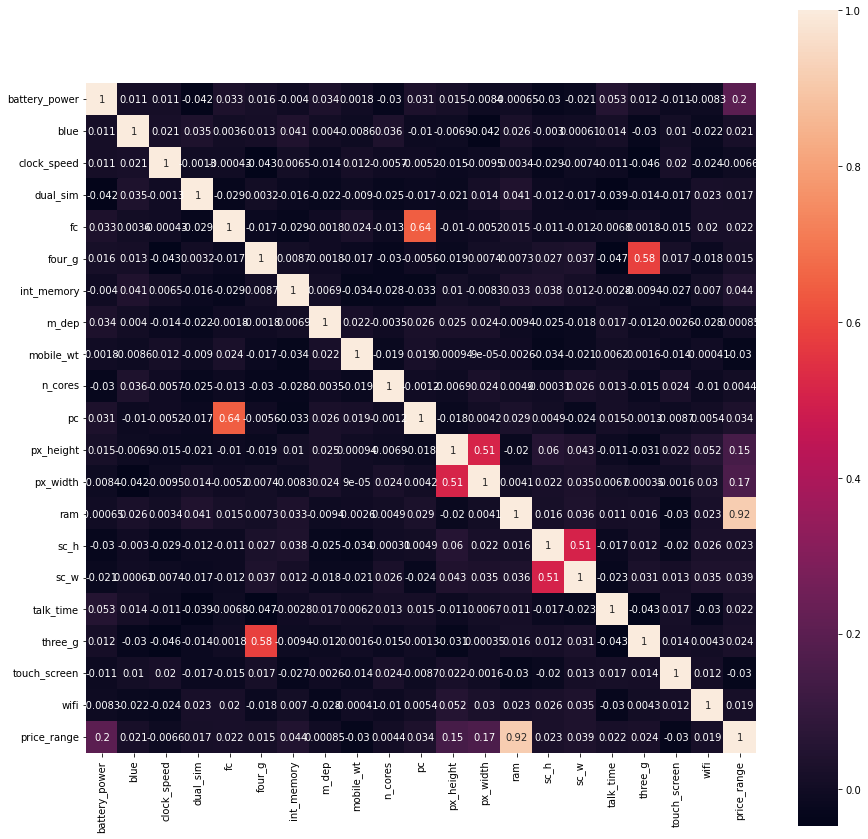

In [26]:
corr=df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 15))

sns.heatmap(corr, square = True ,annot = True)

3

In [27]:
from scipy import stats

In [28]:
alpha = 0.05 
tstat,p_value = stats.ttest_1samp(df['price_range'],popmean = 60.0)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -2339.4149268567126 , p_value : 0.0
reject null hypothesis


In [29]:
wifi = df[df['wifi']== 1]
notwifi = df[df['wifi'] == 0]

In [30]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(wifi.price_range,notwifi.price_range,equal_var = True)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 0.839810370538735 , p_value : 0.4011151943555157
accept null hypothesis


In [31]:
dual = df[df.dual_sim==1]
notdual = df[df.dual_sim==0]

In [32]:
alpha = 0.05 
fstat,p_value = stats.f_oneway(dual.price_range ,notdual.price_range)

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 0.6081961720936766 , p_value : 0.4355601630197592
accept null hypothesis


In [33]:
contingency_table=pd.crosstab(df["battery_power"],df["touch_screen"])
print('contingency_table : \n',contingency_table)

contingency_table : 
 touch_screen   0  1
battery_power      
501            2  0
502            0  2
503            3  0
504            4  1
506            1  0
...           .. ..
1994           2  1
1995           0  2
1996           2  0
1997           1  0
1998           0  1

[1094 rows x 2 columns]


In [34]:
chi2_stat , p_value , dof , expected = stats.chi2_contingency(contingency_table.values)

In [35]:
print('dof : ',dof)

dof :  1093


In [36]:
print('chi2 stat : {} , p_value : {}'.format(chi2_stat,p_value))

chi2 stat : 1109.5679444460002 , p_value : 0.35687448963101


In [37]:
alpha = 0.05

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


In [38]:
alpha = 0.05
tstat,p_value = stats.ttest_rel(df['px_height'],df['px_width'])

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


t stat : -62.5719510595071 , p_value : 0.0
reject null hypothesis


4

In [39]:
from sklearn.model_selection import train_test_split
X = df.drop('price_range',axis=1)
Y=df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


In [41]:
from sklearn.svm import SVC
clf2 = SVC(C=1.0, kernel='rbf', degree=3)


In [42]:
from sklearn import tree
clf3 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)


5

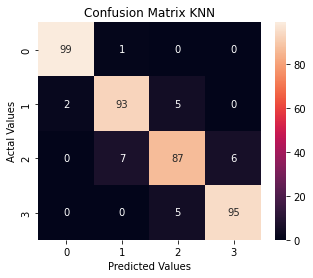

In [43]:
from sklearn.metrics import confusion_matrix
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix KNN')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


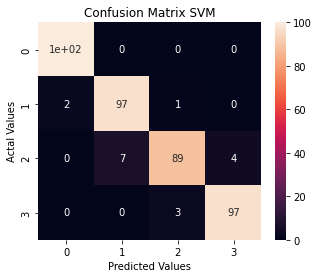

In [44]:
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix SVM')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

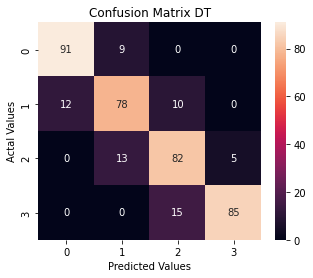

In [45]:
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix DT')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

6

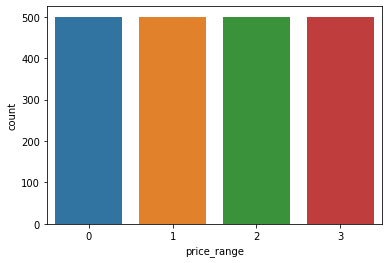

In [46]:
sns.countplot(x = "price_range", data = df)
plt.show()

7

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
Standard_Scaler=StandardScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
X_train_Standard = Standard_Scaler.fit_transform(X_train)
X_test_Standard = Standard_Scaler.transform(X_test)

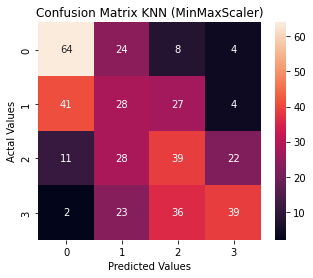

In [48]:
clf1.fit(X_train_minmax, y_train)
y_pred4 = clf1.predict(X_test_minmax)
cm = confusion_matrix(y_test, y_pred4)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix KNN (MinMaxScaler)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


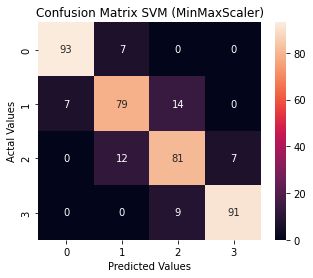

In [49]:
clf2.fit(X_train_minmax, y_train)
y_pred5 = clf2.predict(X_test_minmax)
cm = confusion_matrix(y_test, y_pred5)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix SVM (MinMaxScaler)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


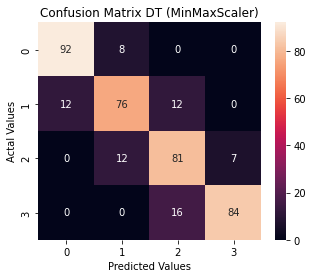

In [50]:
clf3.fit(X_train_minmax, y_train)
y_pred6 = clf3.predict(X_test_minmax)
cm = confusion_matrix(y_test, y_pred6)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix DT (MinMaxScaler)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


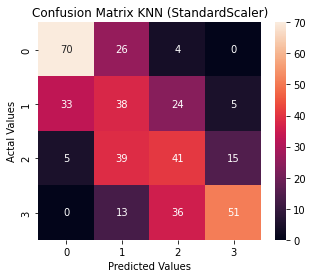

In [51]:
clf1.fit(X_train_Standard, y_train)
y_pred7 = clf1.predict(X_test_Standard)
cm = confusion_matrix(y_test, y_pred7)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix KNN (StandardScaler)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


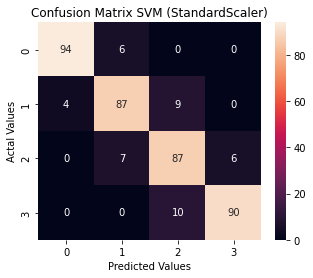

In [52]:
clf2.fit(X_train_Standard, y_train)
y_pred8 = clf2.predict(X_test_Standard)
cm = confusion_matrix(y_test, y_pred8)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix SVM (StandardScaler)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


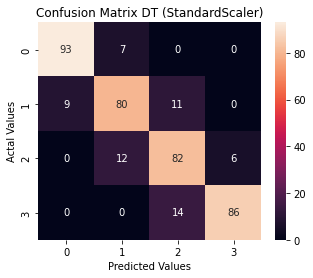

In [53]:
clf3.fit(X_train_Standard, y_train)
y_pred9 = clf3.predict(X_test_Standard)
cm = confusion_matrix(y_test, y_pred9)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix DT (StandardScaler)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


8

In [54]:
from sklearn.metrics import classification_report
print("classification_report of KNN")
print(classification_report(y_test, y_pred1))
print("classification_report of SVM")
print(classification_report(y_test, y_pred2))
print("classification_report of DT")
print(classification_report(y_test, y_pred3))
print("classification_report of KNN (MinMaxScaler)")
print(classification_report(y_test, y_pred4))
print("classification_report of SVM (MinMaxScaler)")
print(classification_report(y_test, y_pred5))
print("classification_report of DT (MinMaxScaler)")
print(classification_report(y_test, y_pred6))
print("classification_report of KNN (StandardScaler)")
print(classification_report(y_test, y_pred7))
print("classification_report of SVM (StandardScaler)")
print(classification_report(y_test, y_pred8))
print("classification_report of DT (StandardScaler)")
print(classification_report(y_test, y_pred9))


classification_report of KNN
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.92      0.93      0.93       100
           2       0.90      0.87      0.88       100
           3       0.94      0.95      0.95       100

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.93      0.94      0.93       400

classification_report of SVM
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.93      0.97      0.95       100
           2       0.96      0.89      0.92       100
           3       0.96      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

classification_report of DT
              precision    recall  f1-score 

9

In [55]:
from sklearn.decomposition import PCA

In [56]:
for i in range(1,5):

  pca = PCA(n_components=i)
  pca.fit(df)
  print("pov = ",pca.explained_variance_ratio_.sum()," n_components = ",i)

pov =  0.6704395324146246  n_components =  1
pov =  0.835618570125668  n_components =  2
pov =  0.9456801149779158  n_components =  3
pov =  0.9990250380098313  n_components =  4


In [57]:
new_df = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(new_df, Y, test_size = 0.2, random_state = 42, stratify = Y)
clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf2 = SVC(C=1.0, kernel='rbf', degree=3)
clf3 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print("classification_report of KNN (n_components=2)")
print(classification_report(y_test, y_pred1))
print("classification_report of SVM (n_components=2)")
print(classification_report(y_test, y_pred2))
print("classification_report of DT (n_components=2)")
print(classification_report(y_test, y_pred3))

classification_report of KNN (n_components=2)
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       100
           1       0.73      0.74      0.73       100
           2       0.72      0.71      0.72       100
           3       0.87      0.88      0.88       100

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

classification_report of SVM (n_components=2)
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       100
           1       0.73      0.77      0.75       100
           2       0.76      0.72      0.74       100
           3       0.91      0.91      0.91       100

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.83       400
weighted avg       0.83      0.82      0.83       400

classification_report of DT (n_compone

In [58]:
new_df = PCA(n_components=3).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(new_df, Y, test_size = 0.2, random_state = 42, stratify = Y)
clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf2 = SVC(C=1.0, kernel='rbf', degree=3)
clf3 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print("classification_report of KNN (n_components=3)")
print(classification_report(y_test, y_pred1))
print("classification_report of SVM (n_components=3)")
print(classification_report(y_test, y_pred2))
print("classification_report of DT (n_components=3)")
print(classification_report(y_test, y_pred3))

classification_report of KNN (n_components=3)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.93      0.94      0.94       100
           2       0.93      0.89      0.91       100
           3       0.94      0.96      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

classification_report of SVM (n_components=3)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.96      0.96      0.96       100
           2       0.94      0.92      0.93       100
           3       0.96      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

classification_report of DT (n_compone

In [59]:
new_df = PCA(n_components=4).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(new_df, Y, test_size = 0.2, random_state = 42, stratify = Y)
clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf2 = SVC(C=1.0, kernel='rbf', degree=3)
clf3 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print("classification_report of KNN (n_components=4)")
print(classification_report(y_test, y_pred1))
print("classification_report of SVM (n_components=4)")
print(classification_report(y_test, y_pred2))
print("classification_report of DT (n_components=4)")
print(classification_report(y_test, y_pred3))

classification_report of KNN (n_components=4)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.92      0.93      0.93       100
           2       0.89      0.87      0.88       100
           3       0.94      0.94      0.94       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

classification_report of SVM (n_components=4)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.96      0.97      0.97       100
           2       0.95      0.92      0.93       100
           3       0.96      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.96      0.96      0.96       400

classification_report of DT (n_compone

10

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

y_train[(y_train==2) | (y_train==3) | (y_train==4)]=5
y_test[(y_test==2) | (y_test==3) | (y_test==4)]=5

clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf2 = SVC(C=1.0, kernel='rbf', degree=3)
clf3 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print("classification_report of KNN (unbalanced)")
print(classification_report(y_test, y_pred1))
print("classification_report of SVM (unbalanced)")
print(classification_report(y_test, y_pred2))
print("classification_report of DT (unbalanced)")
print(classification_report(y_test, y_pred3))

classification_report of KNN (unbalanced)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.92      0.93      0.93       100
           5       0.97      0.96      0.97       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

classification_report of SVM (unbalanced)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.93      0.97      0.95       100
           5       0.99      0.96      0.98       200

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400

classification_report of DT (unbalanced)
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       100
    

In [61]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print(counter)

Counter({5: 800, 1: 400, 0: 400})


In [64]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X_train, y_train)
counter = Counter(Y)
print(counter)

Counter({1: 800, 0: 800, 5: 800})


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf2 = SVC(C=1.0, kernel='rbf', degree=3)
clf3 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print("classification_report of KNN (balanced)")
print(classification_report(y_test, y_pred1))
print("classification_report of SVM (balanced)")
print(classification_report(y_test, y_pred2))
print("classification_report of DT (balanced)")
print(classification_report(y_test, y_pred3))

classification_report of KNN (balanced)
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       160
           1       0.89      1.00      0.94       160
           5       1.00      0.95      0.97       160

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

classification_report of SVM (balanced)
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       160
           1       0.91      0.99      0.95       160
           5       1.00      0.94      0.97       160

    accuracy                           0.96       480
   macro avg       0.97      0.96      0.96       480
weighted avg       0.97      0.96      0.96       480

classification_report of DT (balanced)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       160
          